In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as mpatches

file_path = "timetable_report.xlsx"

def shorten_room(room_name):
        if room_name in room_short_names:
                return room_short_names[room_name]
        return room_name

room_short_names={
    'R106 (LAB)':'R106',
    'R107/R108 (LAB)':'R107/R108',
    'A317 HidesLab':'A317',
    'R401(Amanthran)':'R401',
    'Ramanujan Basement 01 (A- Block)':'RB A',
    'Ramanujan Basement 02 (B- Block)': 'RB B',
    'Ramanujan Basement 03 (C- Block)': 'RB C',
    'Ramanujan Basement 04 (D- Block)': 'RB D',
    'Ramanujan Basement 05 (E- Block)': 'RB E',
    'R-310':'R310',
}

room_data = pd.read_csv('classroom_master.csv')
all_rooms = room_data['RoomNumber'].values.tolist()
capacity = room_data['Capacity'].values.tolist()
all_rooms = [shorten_room(room) for room in all_rooms]
print(all_rooms)
room_capacity = dict(zip(all_rooms, capacity))
print(room_capacity)

exam_slot_report = pd.read_excel(file_path, sheet_name="Exam Slot report")
seating_report = pd.read_excel(file_path, sheet_name="Seating Report")
exam_slot_report = exam_slot_report[['Course Code','size','day', 'duration','begin', 'end']]
seating_report = seating_report[['Course Code','Title','Room', 'Capacity','Seating']]

exam_data = pd.merge(exam_slot_report, seating_report, on='Course Code', how='left')

exam_data.to_excel("merged_data.xlsx", index=False)


['R102', 'R103', 'R104', 'R105', 'R106', 'R107/R108', 'R110', 'A204', 'R305', 'R306', 'R203', 'A303', 'R101', 'A106', 'A307', 'A308', 'A310', 'A304/A305', 'A317', 'A226', 'R308', 'A107', 'R401', 'R109', 'RB A', 'RB B', 'RB C', 'RB D', 'RB E', 'A314', 'R310']
{'R102': 60, 'R103': 210, 'R104': 60, 'R105': 70, 'R106': 70, 'R107/R108': 115, 'R110': 70, 'A204': 120, 'R305': 20, 'R306': 20, 'R203': 230, 'A303': 90, 'R101': 60, 'A106': 200, 'A307': 110, 'A308': 40, 'A310': 60, 'A304/A305': 90, 'A317': 65, 'A226': 12, 'R308': 15, 'A107': 15, 'R401': 160, 'R109': 35, 'RB A': 80, 'RB B': 80, 'RB C': 80, 'RB D': 80, 'RB E': 80, 'A314': 12, 'R310': 6}


In [6]:


file_path = "timetable_report.xlsx"

def shorten_room(room_name):
        if room_name in room_short_names:
                return room_short_names[room_name]
        return room_name

room_short_names={
    'R106 (LAB)':'R106',
    'R107/R108 (LAB)':'R107/R108',
    'A317 HidesLab':'A317',
    'R401(Amanthran)':'R401',
    'Ramanujan Basement 01 (A- Block)':'RB A',
    'Ramanujan Basement 02 (B- Block)': 'RB B',
    'Ramanujan Basement 03 (C- Block)': 'RB C',
    'Ramanujan Basement 04 (D- Block)': 'RB D',
    'Ramanujan Basement 05 (E- Block)': 'RB E',
    'R-310':'R310',
}

room_data = pd.read_csv('classroom_master.csv')
all_rooms = room_data['RoomNumber'].values.tolist()
capacity = room_data['Capacity'].values.tolist()
all_rooms = [shorten_room(room) for room in all_rooms]
print(all_rooms)
room_capacity = dict(zip(all_rooms, capacity))
print(room_capacity)

exam_slot_report = pd.read_excel(file_path, sheet_name="Exam Slot report")
seating_report = pd.read_excel(file_path, sheet_name="Seating Report")
exam_slot_report = exam_slot_report[['Course Code','size','day', 'duration','begin', 'end']]
seating_report = seating_report[['Course Code','Title','Room', 'Capacity','Seating']]

exam_data = pd.merge(exam_slot_report, seating_report, on='Course Code', how='left')

exam_data.to_excel("merged_data.xlsx", index=False)


def plot1(exam_data, day, room_capacity):
    df_day = exam_data[exam_data['day'] == day].copy()
    if df_day.empty:
        print(f"No exams for {day}.")
        return

    df_day['begin'] = pd.to_datetime(df_day['begin'], format='%H:%M')
    df_day['end']   = pd.to_datetime(df_day['end'],   format='%H:%M')
    df_day['StartMins'] = df_day['begin'].dt.hour * 60 + df_day['begin'].dt.minute
    df_day['EndMins']   = df_day['end'].dt.hour   * 60 + df_day['end'].dt.minute

    unique_courses = df_day['Course Code'].unique()
    # color_map = plt.cm.hsv(np.linspace(0, 1, len(unique_courses)))
    # use viridis
    color_map = [plt.cm.hsv(i / len(unique_courses)) for i in range(len(unique_courses))]
    # color_map = plt.cm.viridis(np.linspace(0, 1, len(unique_courses)))
    # unique_courses_scramble = sorted(unique_courses) sort on time
    d={}
    for i in range(len(unique_courses)):
        d[unique_courses[i]]=df_day[df_day['Course Code']==unique_courses[i]].iloc[0]['StartMins']

    unique_courses_scramble = sorted(d, key=d.get)
    print(unique_courses_scramble)
    lstart = []
    lend=[]
    for i in range(len(unique_courses_scramble)):
        if i & 1:
            lend.append(unique_courses_scramble[i])
        else:
            lstart.append(unique_courses_scramble[i])
    unique_courses_scramble = lstart+lend
    print(unique_courses_scramble)
    course_colors = dict(zip(unique_courses_scramble, color_map))

    def shorten_room(room_name):
        if room_name in room_short_names:
            return room_short_names[room_name]
        return room_name

    df_day['Room'] = df_day['Room'].apply(shorten_room)
    unique_rooms = list(df_day['Room'].unique())

    current_y = 0
    room_positions = {}
    for rm in unique_rooms:
        cap = room_capacity[rm]
        room_positions[rm] = (current_y, cap)
        current_y += cap

    fig, ax = plt.subplots(figsize=(10, 8))

    all_bars = []

    for rm in unique_rooms:
        df_room = df_day[df_day['Room'] == rm].copy()
        if df_room.empty:
            continue
        df_room.sort_values(by='StartMins', inplace=True)

        y0, band_height = room_positions[rm]
        cap_rm = room_capacity[rm]
        ongoing = []

        for _, exam in df_room.iterrows():
            start_m = exam['StartMins']
            end_m   = exam['EndMins']
            seating = exam['Seating']
            ccode   = exam['Course Code']

            ongoing = [o for o in ongoing if o['end'] > start_m]

            ratio = seating / cap_rm 
            bar_height = ratio * band_height

            if ongoing and not (max(o['top'] for o in ongoing) + bar_height > band_height):
                bar_bottom = max(o['top'] for o in ongoing)
            else:
                bar_bottom = y0

            label = f"{ccode} ({seating} / {cap_rm})"
            color = course_colors[ccode]
            width = end_m - start_m
            current_bar = (start_m, width, bar_bottom, bar_height, color, label)
            all_bars.append(current_bar)

            ongoing.append({
                'end': end_m,
                'top': bar_bottom + bar_height
            })

    for x_left, width, y_bottom, bar_height, color, label_text in all_bars:
        ax.barh(y_bottom + bar_height/2, width=width, left=x_left, height=bar_height, color=color)
        x_center = x_left + width/2
        y_center = y_bottom + bar_height/2
        # ax.text(x_center, y_center, label_text, ha='center', va='center', fontsize=8, color='black')
        # also add a border to text
        ax.text(x_center, y_center, label_text, ha='center', va='center', fontsize=6.9, color='black')
        # add text outline
        # ax.text(x_center, y_center, label_text, ha='center', va='center', fontsize=8, color='black', path_effects=[pe.withStroke(linewidth=2, foreground='white')])

    ax.set_xticks(range(9*60, 17*60 + 1, 60))
    ax.set_xticklabels([f"{h}:00" for h in range(9, 18)])
    ax.set_xlim(9*60, 17*60)


    ax.set_ylim(0, current_y)

    y_ticks = []
    y_labels = []
    for rm in unique_rooms:
        ystart, cap = room_positions[rm]
        y_ticks.append(ystart + cap/2)
        y_labels.append(rm)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.set_ylabel("Room (scaled by capacity)")

    for rm in unique_rooms:
        ystart, cap = room_positions[rm]
        ax.axhline(y=ystart, color='black', linewidth=0.8)
    ax.axhline(y=current_y, color='black', linewidth=0.8)

    ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.set_xlabel("Time (Minutes)")
    ax.set_title(f"Mid-Semester Exam Timetable - {day}")

    handles = [mpatches.Patch(color=course_colors[c], label=c) for c in unique_courses]
    ax.legend(handles=handles, loc='upper left', fontsize=8, title="Courses")
    # ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)


    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjusts space to the right


    plt.tight_layout()
    # ax.legend().set_title('Courses')
    plt.savefig(f"generated_timetable_{day}-1.png", dpi=150)
    plt.show()




# plot1(exam_data, 'Tue', room_capacity)

['R102', 'R103', 'R104', 'R105', 'R106', 'R107/R108', 'R110', 'A204', 'R305', 'R306', 'R203', 'A303', 'R101', 'A106', 'A307', 'A308', 'A310', 'A304/A305', 'A317', 'A226', 'R308', 'A107', 'R401', 'R109', 'RB A', 'RB B', 'RB C', 'RB D', 'RB E', 'A314', 'R310']
{'R102': 60, 'R103': 210, 'R104': 60, 'R105': 70, 'R106': 70, 'R107/R108': 115, 'R110': 70, 'A204': 120, 'R305': 20, 'R306': 20, 'R203': 230, 'A303': 90, 'R101': 60, 'A106': 200, 'A307': 110, 'A308': 40, 'A310': 60, 'A304/A305': 90, 'A317': 65, 'A226': 12, 'R308': 15, 'A107': 15, 'R401': 160, 'R109': 35, 'RB A': 80, 'RB B': 80, 'RB C': 80, 'RB D': 80, 'RB E': 80, 'A314': 12, 'R310': 6}


In [7]:
! pip install img2pdf

['CSE 824', 'CSE 102-B', 'DAS 839', 'DHS 305', 'DAS 101-B', 'DHS 611', 'ECE 212P', 'CSE 102 P-A']
['CSE 824', 'DAS 839', 'DAS 101-B', 'ECE 212P', 'CSE 102-B', 'DHS 305', 'DHS 611', 'CSE 102 P-A']


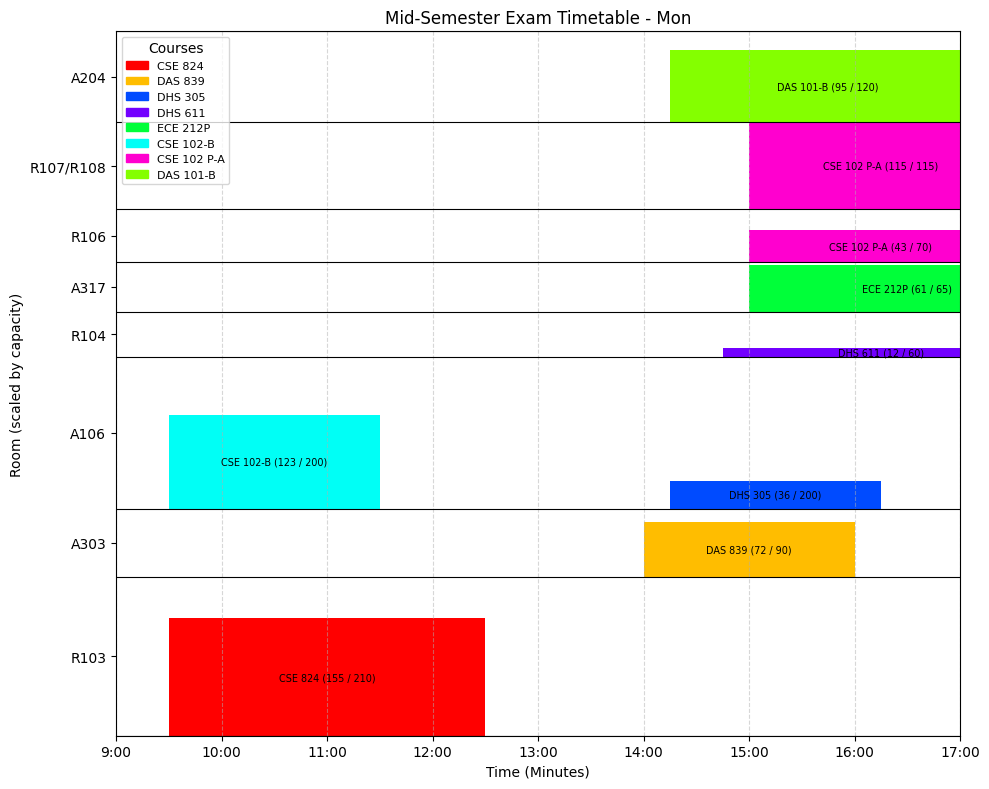

['AMS 401', 'AMS 404', 'AMS 403', 'CSE 816', 'AMS 402', 'CSE 754', 'DHS 315', 'VLS 603', 'EGC 121-B', 'AIM 102', 'EGC 123-A']
['AMS 401', 'AMS 403', 'AMS 402', 'DHS 315', 'EGC 121-B', 'EGC 123-A', 'AMS 404', 'CSE 816', 'CSE 754', 'VLS 603', 'AIM 102']


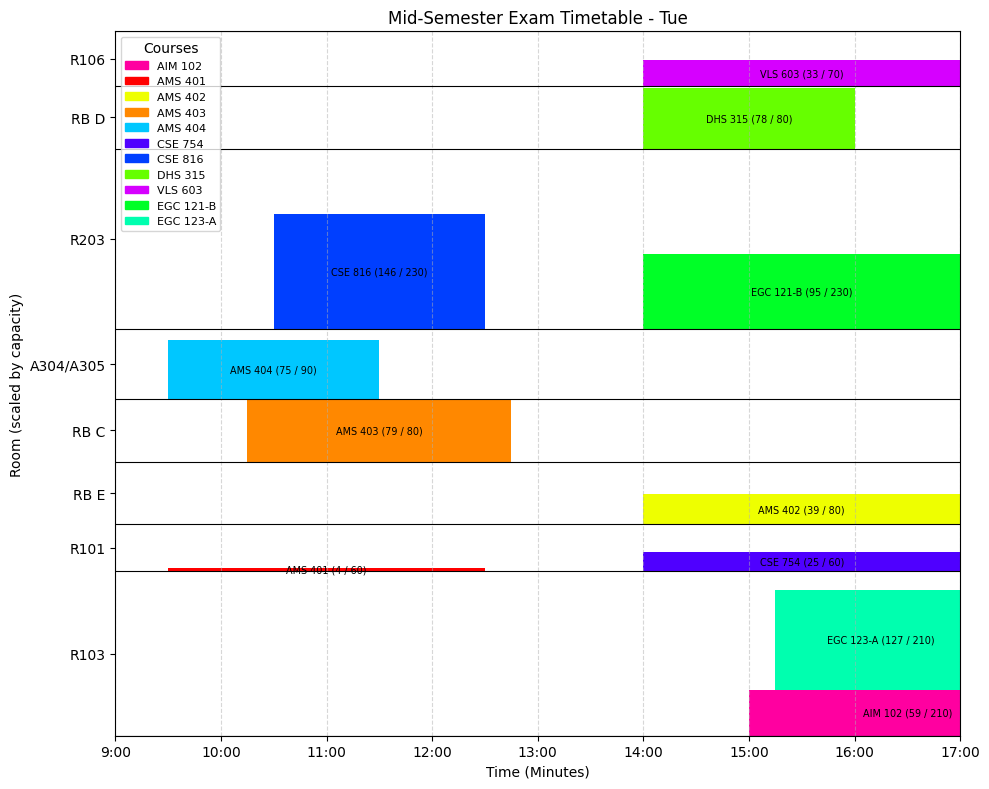

['EGC 121-A', 'CSE 836', 'VLS 804', 'AIM 101', 'DHS 314', 'AIM 843', 'EGC 301', 'CSE 718', 'AIM 704', 'EGC 123-B']
['EGC 121-A', 'VLS 804', 'DHS 314', 'EGC 301', 'AIM 704', 'CSE 836', 'AIM 101', 'AIM 843', 'CSE 718', 'EGC 123-B']


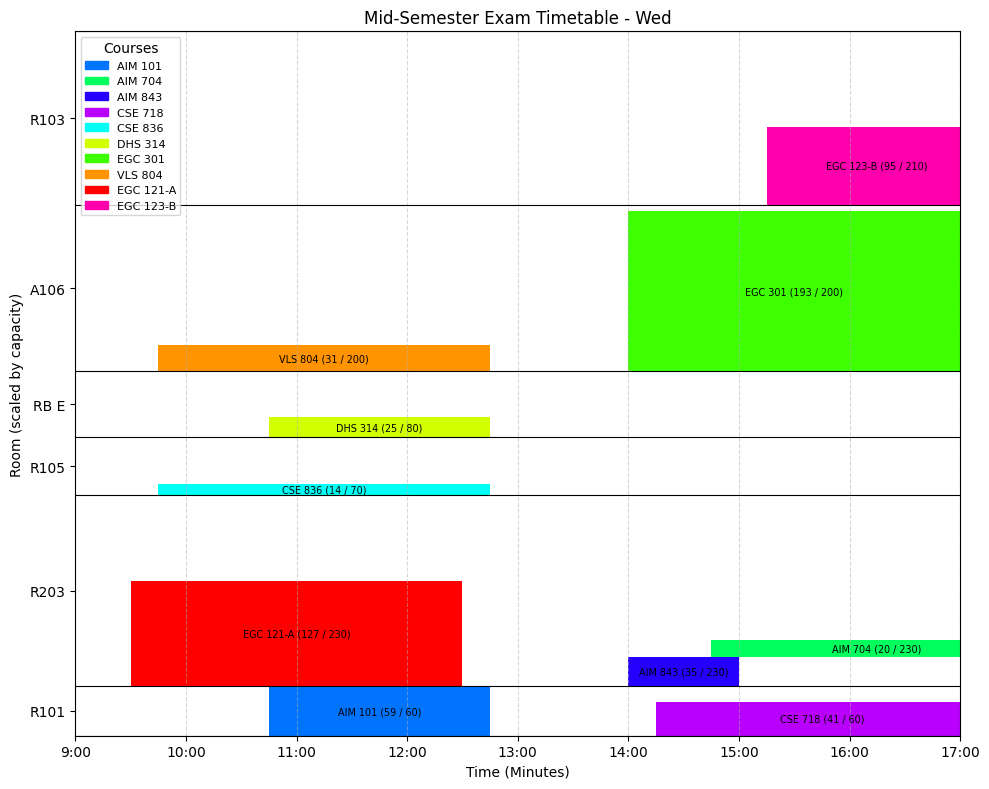

['AIM 821', 'ECE 303', 'CSE 102 P-B', 'AIM 832', 'CSE 606', 'CSE 212', 'DHS 306']
['AIM 821', 'CSE 102 P-B', 'CSE 606', 'DHS 306', 'ECE 303', 'AIM 832', 'CSE 212']


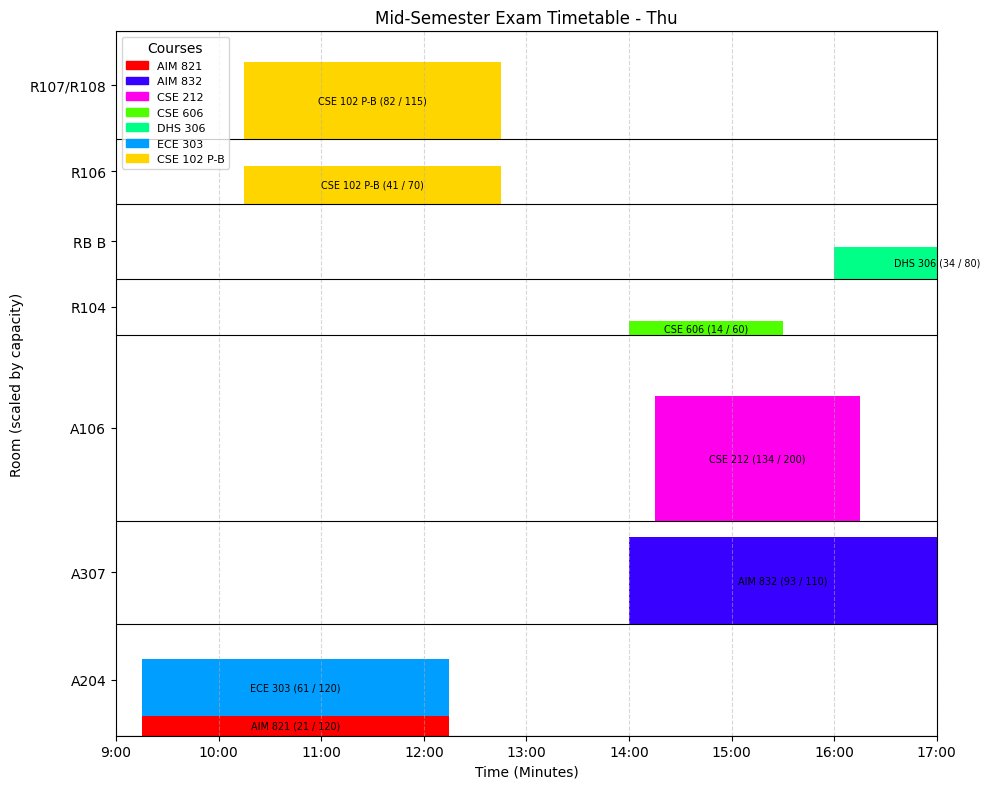

['DHS 308', 'ECE 304', 'CSE 104-A', 'COM 605', 'DAS 605', 'CSE 104-B', 'ECE 212', 'CSE 704', 'DAS 101P-A']
['DHS 308', 'CSE 104-A', 'DAS 605', 'ECE 212', 'DAS 101P-A', 'ECE 304', 'COM 605', 'CSE 104-B', 'CSE 704']


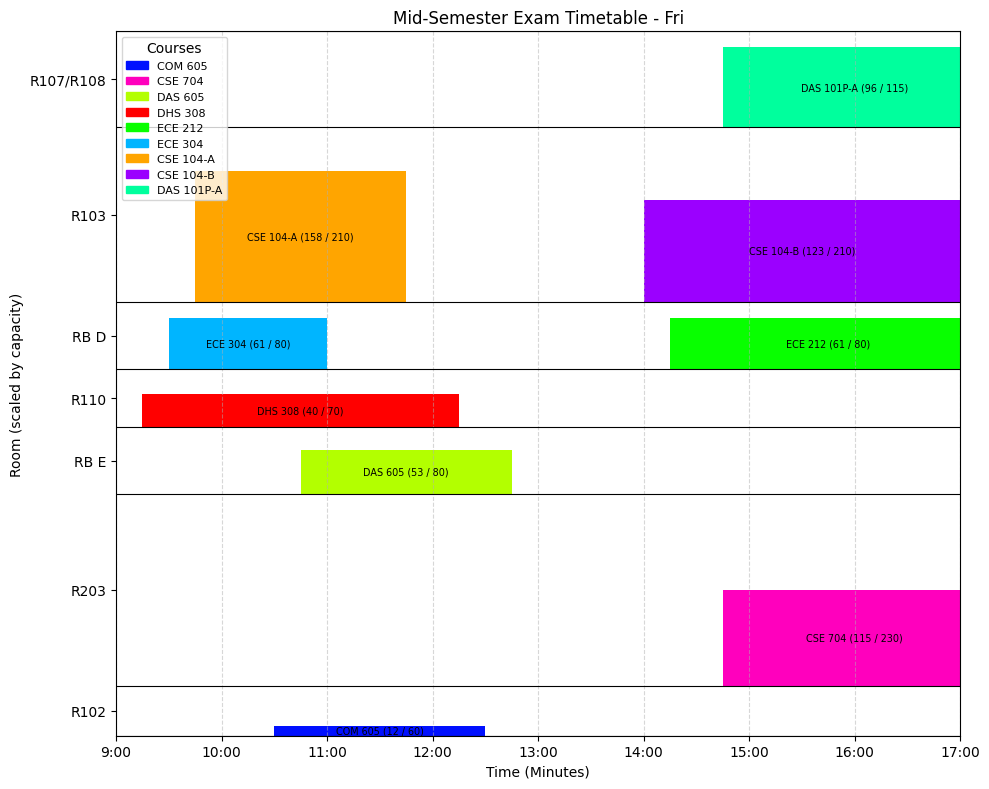

['AIM 831', 'ECE 303P', 'CSE 102-A', 'AIM 846', 'DHS 108', 'DAS 101-A', 'DAS 101P-B', 'AIM 845']
['AIM 831', 'CSE 102-A', 'DHS 108', 'DAS 101P-B', 'ECE 303P', 'AIM 846', 'DAS 101-A', 'AIM 845']


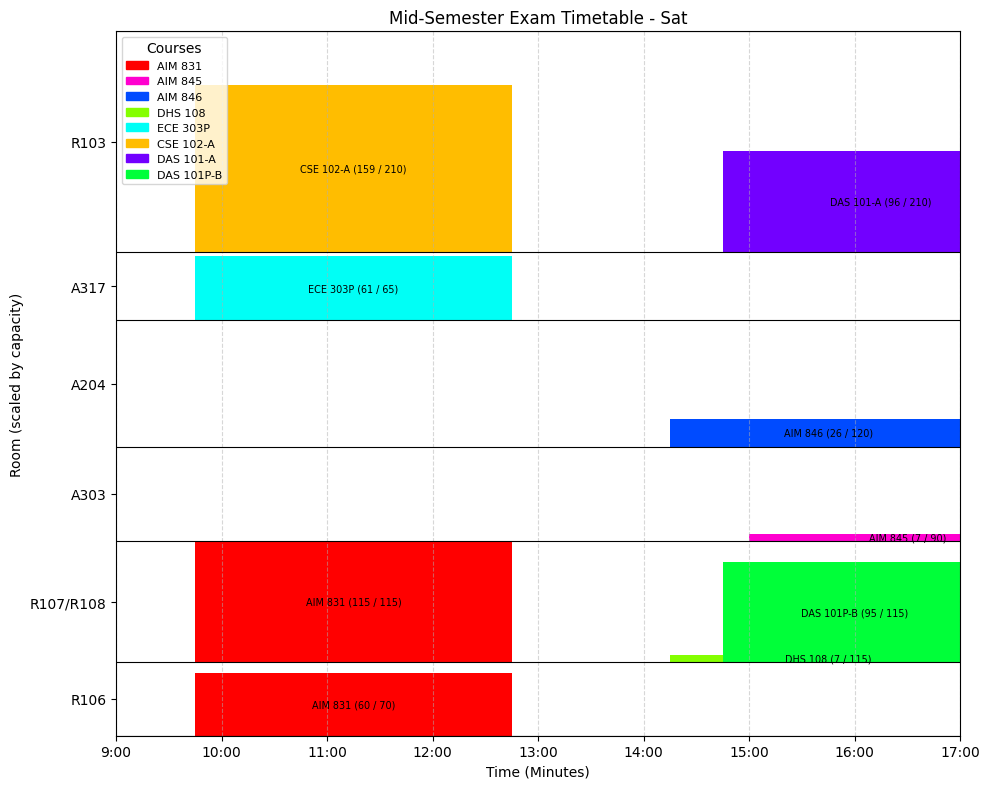

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


Done


In [8]:
import img2pdf

days=['Mon','Tue','Wed','Thu','Fri','Sat']

l1=[]
l2=[]
for day in days:
    plot1(exam_data, day, room_capacity)
    l1.append(f"generated_timetable_{day}-1.png")

with open("timetable-plot.pdf", "wb") as f:
    f.write(img2pdf.convert(l1))

import os
for file in l1:
    os.remove(file)

os.remove("merged_data.xlsx")

print("Done")